# 두 object 비교

* `v1 == v2` : 변수 v1과 v2가 reference하는 object의 내용이 같은가?
* `v1 is v2` : 변수 v1과 v2가 reference하는 object는 동일 object인가?

In [8]:
r1 = [1, 2, 3]
r2 = [1, 2, 3]

print(r1 == r2)
print(r1 is r2)
print(f"\tid(r1) : {id(r1)}")
print(f"\tid(r2) : {id(r2)}")

True
False
	id(r1) : 139781495237504
	id(r2) : 139781495236416


In [9]:
r1 = [1, 2, 3]
r2 = r1 # r1이 참조하는 list를 r2도 참조

print(r1 is r2)
print(f"\tid(r1) : {id(r1)}")
print(f"\tid(r2) : {id(r2)}")

True
	id(r1) : 139781494847872
	id(r2) : 139781494847872


# list의 object reference

* list를 생성하면 list 안에 선언되는 값들이 list에 들어가는 것이 아니라,
* 값들이 저장되는 메모리 주소가 list에 저장된다.
* 즉, 각 값(object)들을 list 내에서 reference한다.
* 아래 그림처럼

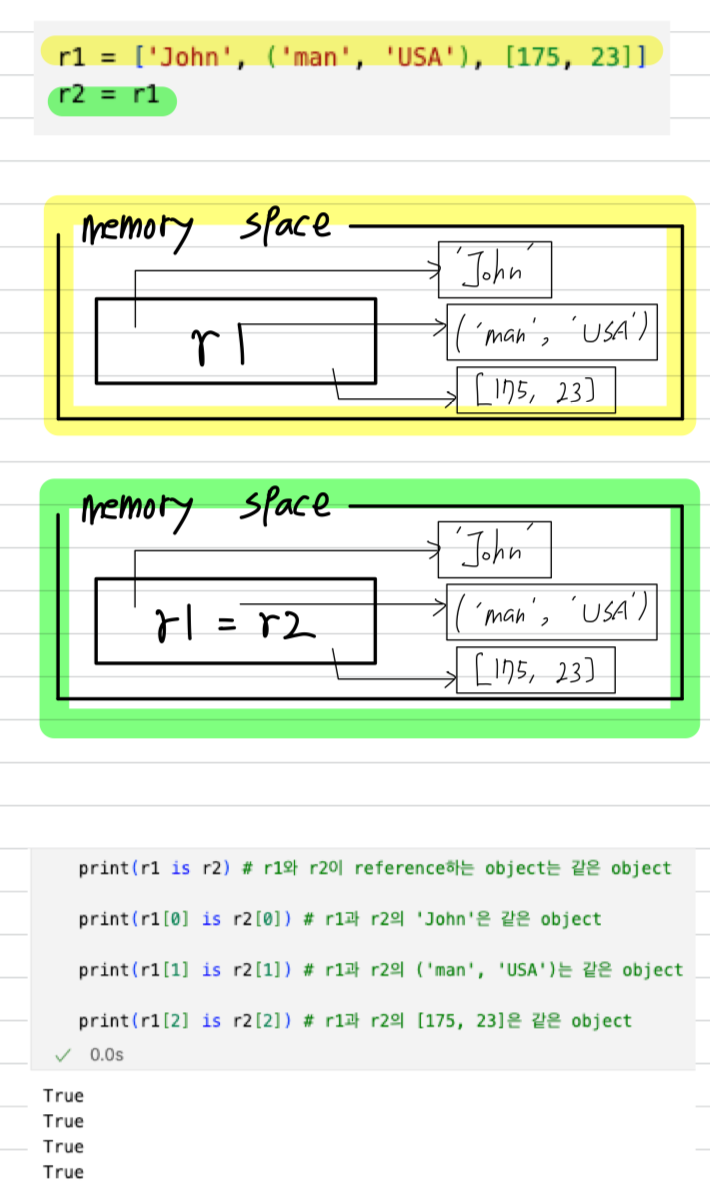

In [1]:
r1 = ['John', ('man', 'USA'), [175, 23]]
r2 = r1 

print(r1 is r2) # r1와 r2이 reference하는 object는 같은 object

print(r1[0] is r2[0]) # r1과 r2의 'John'은 같은 object

print(r1[1] is r2[1]) # r1과 r2의 ('man', 'USA')는 같은 object

print(r1[2] is r2[2]) # r1과 r2의 [175, 23]은 같은 object

True
True
True
True


# Shallow copy (for immutable object)

``` py
r2 = list(r1)
```
와 같은 복사를 `Shallow Copy`라고 한다.
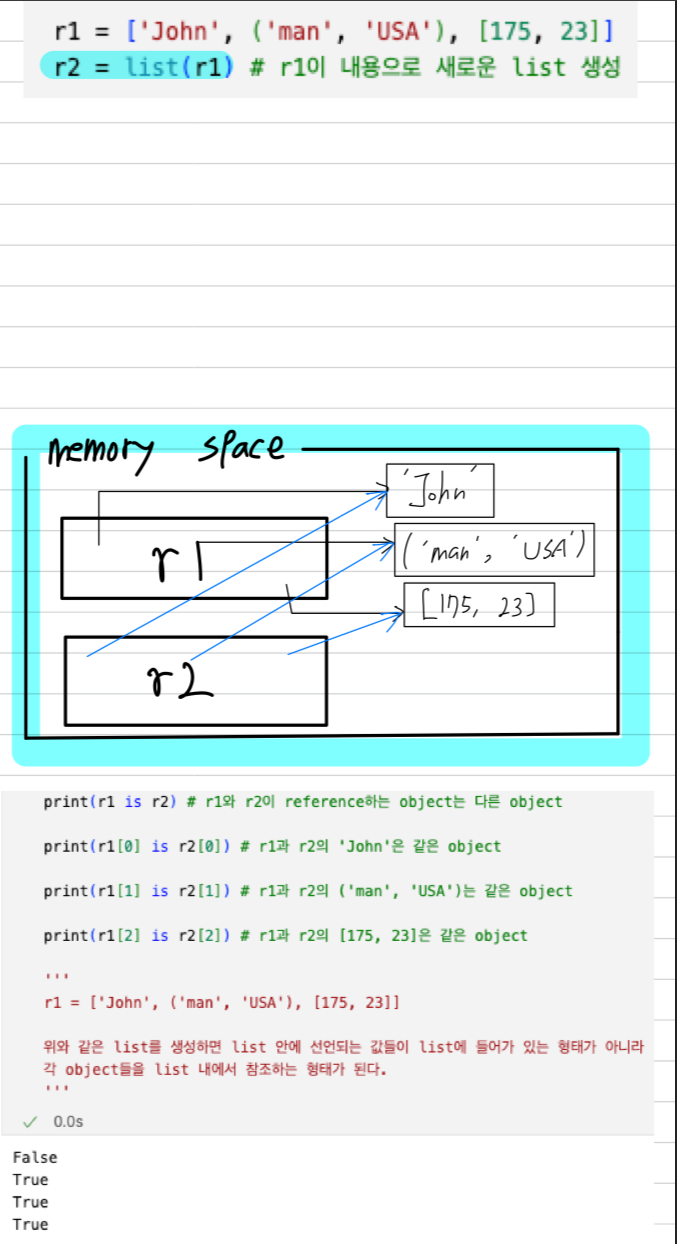


* `Shallow Copy`는 Python이 복사를 진행하는 기본 방식이다.
* <span style="color:red">사실 immutable object인 string object('John'), tuple object(('man', 'USA'))를 대상으로는 `Shallow Copy`를 해도 문제가 되지 않는다.</span>
* <span style="color:red">그러나 mutable object인 list object([175, 23])를 대상으로 `Shallow Copy`를 하면 문제가 될 수 있다.</span>

In [2]:
r1 = ['John', ('man', 'USA'), [175, 23]]
r2 = list(r1) # r1이 내용으로 새로운 list 생성

print(r1 is r2) # r1와 r2이 reference하는 object는 다른 object

print(r1[0] is r2[0]) # r1과 r2의 'John'은 같은 object

print(r1[1] is r2[1]) # r1과 r2의 ('man', 'USA')는 같은 object

print(r1[2] is r2[2]) # r1과 r2의 [175, 23]은 같은 object

'''
r1 = ['John', ('man', 'USA'), [175, 23]]

위와 같은 list를 생성하면 list 안에 선언되는 값들이 list에 들어가 있는 형태가 아니라 
각 object들을 list 내에서 참조하는 형태가 된다.
'''

False
True
True
True


"\nr1 = ['John', ('man', 'USA'), [175, 23]]\n\n위와 같은 list를 생성하면 list 안에 선언되는 값들이 list에 들어가 있는 형태가 아니라 \n각 object들을 list 내에서 참조하는 형태가 된다.\n\n\n\n"

# Deep Copy (for mutable object)

* 정리하면 immutable object는 `Shallow Copy`를 해도 문제가 되지 않지만, mutable object는 문제가 될 수 있다.
* 아래 예제를 보자

In [7]:
J2021 = ['John', ('man', 'USA'), [175, 23]] # 2021년도 John의 정보
J2022 = list(J2021) # 필요에 의해 John의 정보를 복사

J2022[2][1] += 1 # 2022년도 John의 나이를 1살 더 먹음

print(J2021) # 2021년도 John의 정보
print(J2022) # 2022년도 John의 정보

['John', ('man', 'USA'), [175, 24]]
['John', ('man', 'USA'), [175, 24]]


John은 해가 지날수록 나이를 먹는다.
</br>그래서 위의 예시에서는 2021년도 John의 정보를 복사하여 2022년도 John의 정보를 만들었다.
</br>그런데 Shallow Copy로 인해 2022년 John의 나이를 먹이면 2021년도 John의 나이도 먹게 된다.
</br><span style="color:red">이렇듯 mutable object에 저장된 값들은 변경될 수 있기 때문에</span> 
</br>이들에 대해서는 복사 대상을 하나 더 생성하는 `Deep Copy`를 사용해야 한다.

* 아래 그림과 같이 immutable object인 string('John')과 tuple(('man', 'USA'))는 Shallow Copy,
  mutable object인 list([175, 23])는 Deep Copy를 사용하는 것이 의도에 맞는 프로그래밍이다.
  또한 안정성과 성능을 모두 고려하여 Deep Copy를 사용하는 것이 좋다.
* `Deep Copy`는 `copy` 모듈의 `deepcopy` 함수를 사용한다.
  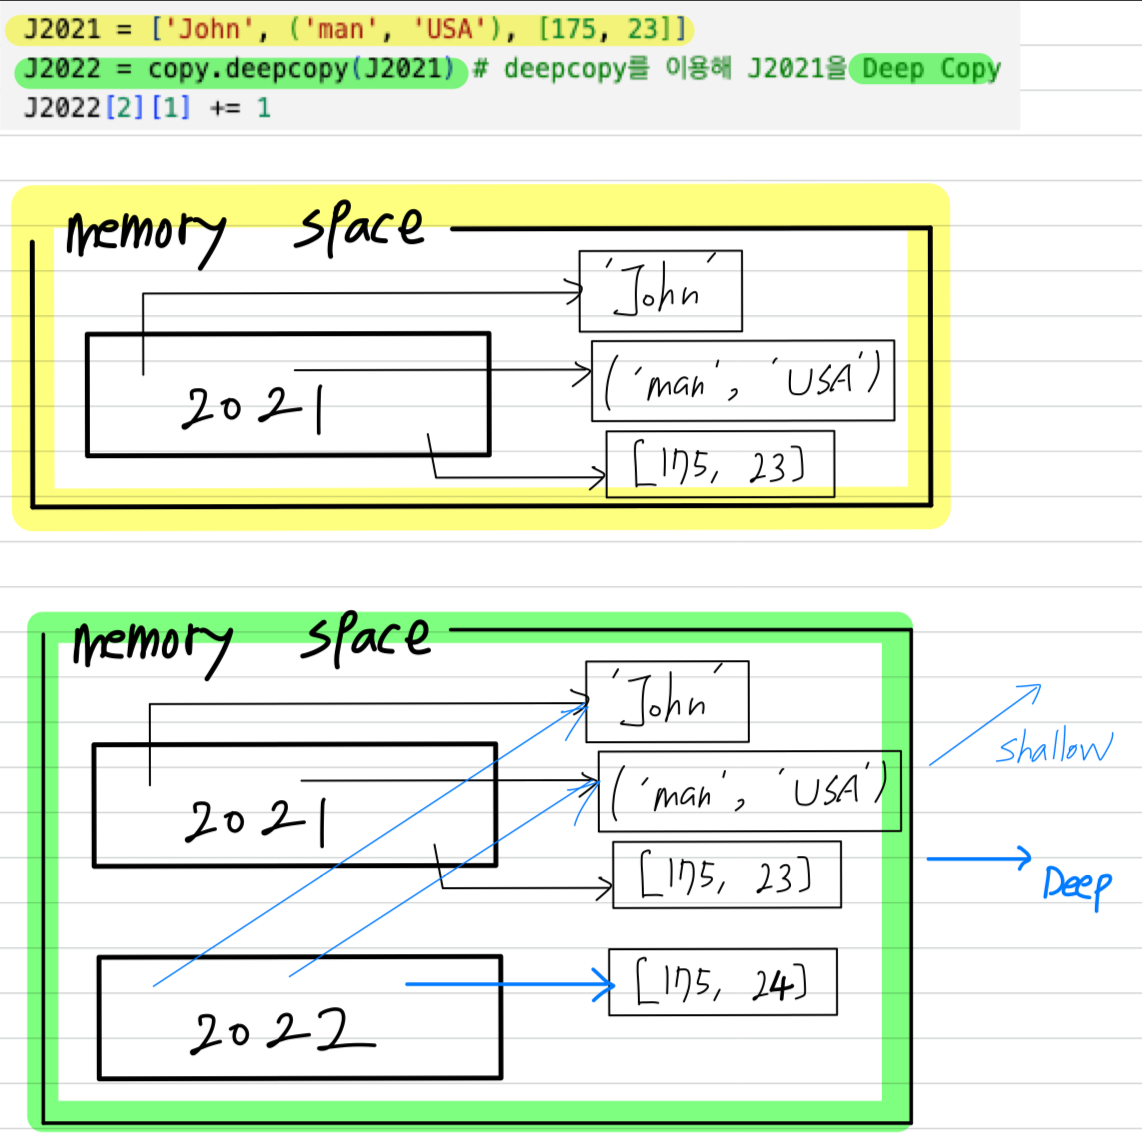

In [9]:
import copy

J2021 = ['John', ('man', 'USA'), [175, 23]] 
J2022 = copy.deepcopy(J2021) # deepcopy를 이용해 J2021을 Deep Copy
J2022[2][1] += 1

print(J2021) # 2021년도 John의 정보
print(J2022) # 2022년도 John의 정보

print(J2021[0] is J2022[0]) # J2021과 J2022의 'John'은 같은 object -> deepcopy 함수에서 immutable object를 대상으로 shallow copy가 진행되었음
print(J2021[1] is J2022[1]) # J2021과 J2022의 'John'은 같은 object -> deepcopy 함수에서 immutable object를 대상으로 shallow copy가 진행되었음
print(J2021[2] is J2022[2]) # J2021과 J2022의 [175, 23]은 다른 object -> deepcopy 함수에서 mutable object를 대상으로 deep copy가 진행되었음

['John', ('man', 'USA'), [175, 23]]
['John', ('man', 'USA'), [175, 24]]
True
True
False


In [7]:
d1 = (1, 2, 3)
d2 = 'Please'
d3 = [1, 2, 3]

immu1 = tuple(d1) # d1 기반으로 tuple 생성, 사실상 tuple 복사
immu2 = str(d2) # d2 기반으로 string 생성, 사실상 string 복사
mu3 = list(d3) # d3 기반으로 list 생성, 사실상 list 복사

print(immu1 is d1) # immu1과 d1은 같은 object를 참조
print(immu2 is d2) # immu2와 d2는 같은 object를 참조
print(mu3 is d3) # mu3와 d3는 다른 object를 참조

'''
memory 효율적 사용을 위해 python은 '선한 거짓말'을 하고 있다.
그러나 immutable object에 대한 상황에서는 문제가 없기 때문에 속아줘도 된다.
단, mutable object에 대해서는 deepcopy를 사용해서 복사해야 한다.
'''

True
True
False


"\nmemory 효율적 사용을 위해 python은 '선한 거짓말'을 하고 있다.\n그러나 immutable object에 대한 상황에서는 문제가 없기 때문에 속아줘도 된다.\n단, mutable object에 대해서는 deepcopy를 사용해서 복사해야 한다.\n"